# Time Series Forecasting

__What is Time Series Analysis?__

A time series is nothing but a sequence of various data points that occurred in a successive order for a given period of time<br>

__How to analyze Time Series?__

- Collecting the data and cleaning it
- Preparing Visualization with respect to time vs key feature
- Observing the stationarity of the series
- Developing charts to understand its nature.
- Model building – AR, MA, ARMA and ARIMA
- Extracting insights from prediction

__Components of Time Series Analysis__

__Trend__: In which there is no fixed interval and any divergence within the given dataset is a continuous timeline. The trend would be Negative or Positive or Null Trend<br>
__Seasonality__: In which regular or fixed interval shifts within the dataset in a continuous timeline. Would be bell curve or saw tooth<br>
__Cyclical__: In which there is no fixed interval, uncertainty in movement and its pattern<br>
__Irregularity__: Unexpected situations/events/scenarios and spikes in a short time span.<br>

__Data Types of Time Series__<br>
Let’s discuss the time series’ data types and their influence. While discussing TS data-types, there are two major types.
- Stationary
- Non- Stationary<br>

__Stationary__: A dataset should follow the below thumb rules, without having Trend, Seasonality, Cyclical, and Irregularity component of time series
- The MEAN value of them should be completely constant in the data during the analysis
- The VARIANCE should be constant with respect to the time-frame
- The COVARIANCE measures the relationship between two variables. <br>

__Non- Stationary__: This is just the opposite of Stationary.<br>

__Methods to check Stationarity__

__Statistical Test__: There are two tests available to test if the dataset is Stationary or NOT.
- Augmented Dickey-Fuller (ADF) Test
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test<br>

__Augmented Dickey-Fuller (ADF) Test or Unit Root Test__: The ADF test is the most popular statistical test and with the following assumptions.
- Null Hypothesis (H0): Series is non-stationary
- Alternate Hypothesis (HA): Series is stationary
- p-value >0.05 Fail to reject (H0)
- p-value <= 0.05 Accept (H1) <br>

__Kwiatkowski–Phillips–Schmidt–Shin (KPSS)__: these tests are used for testing a NULL Hypothesis (HO), that will perceive the time-series, as stationary around a deterministic trend against the alternative of a unit root. Since TSA looking for Stationary Data for its further analysis, we have to make sure that the dataset should be stationary.

__Converting Non- stationary into stationary__
Let’s discuss quickly how to convert Non- stationary into stationary for effective time series modeling. There are two major methods available for this conversion.
- Detrending
- Differencing
- Transformation

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

In [87]:
data=pd.read_csv("Electric_Production.csv",parse_dates=['DATE'])
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [88]:
data.isna().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [89]:
data.rename(columns={'IPG2211A2N':'value'},inplace=True)
data.head()

,DATE,value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [90]:
data.shape

(397, 2)

In [91]:
data=data.set_index(['DATE'])
data

,value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


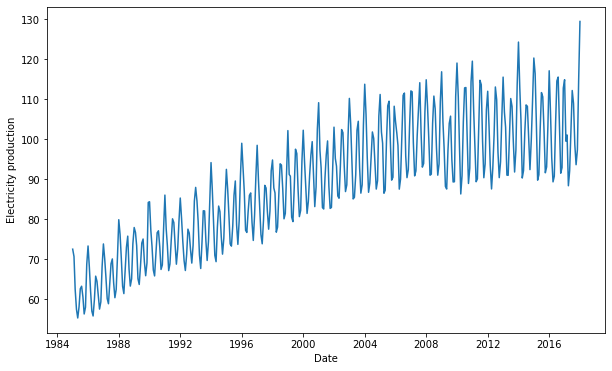

In [92]:
plt.xlabel('Date')
plt.ylabel('Electricity production')
plt.plot(data)

In [93]:
# Create Decomposing Function
def decompose(timeseries):
    timeseries.dropna(inplace=True)
    decomposition=seasonal_decompose(timeseries)
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid

    #create subplots for the data visualization
    
    fig, (ax1, ax2,ax3, ax4) =plt.subplots (4, sharex=True, constrained_layout=False)
    ax1. set_title (" Visualizations for Timeseries,Trend, Seasonality and Resudials" )
    
    l1 =ax1.plot(timeseries,color='blue')
    
    l2 =ax2.plot(trend,color='red')

    l3 =ax3.plot(seasonal,color='green')

    l4 =ax4.plot(residual,color='orange')
    labels=['Time series','Trend','Seasonality', 'Residuals']

    fig.legend(labels=labels, loc= 'lower center', ncol=5)
    plt.show()

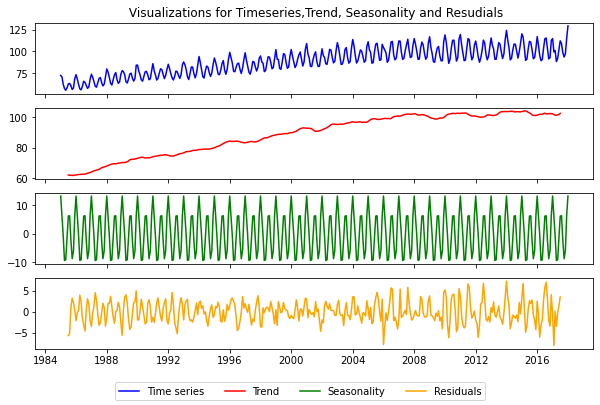

In [94]:
decompose(data)

## Rolling statistics

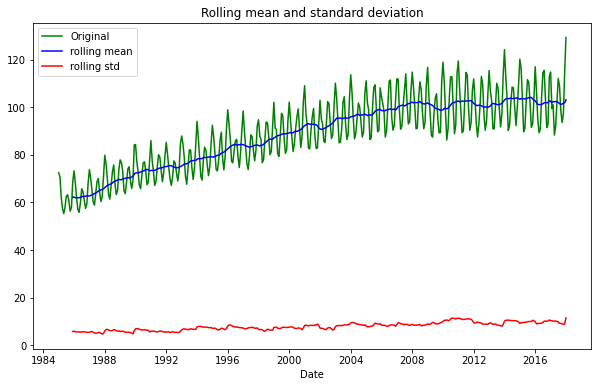

In [95]:
rmean=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()

#plotting
origin=plt.plot(data,color='green',label='Original')
avg=plt.plot(rmean,color='blue',label='rolling mean')
std=plt.plot(rstd,color='red',label='rolling std')
plt.legend()
plt.xlabel('Date')
plt.title('Rolling mean and standard deviation')
plt.show()

## Augmented Dickey-Fuller Test

The test is used to determine whether the timeseries is stationary or not if p-value is greater than 0.5, the timeseries is not stationary

In [96]:
def test(ts):
    print("Results of ADFT")
    test=adfuller(ts['value'],autolag='AIC')
    out=pd.Series(test[0:4],index=['Test Statistic','P-value','Lags Used','No. of Observations Used'])
    for key,value in test[4].items():
        out['critical value (%s)' %key]=value
    print(out)
test(data)

Results of ADFT
Test Statistic               -2.256990
P-value                       0.186215
Lags Used                    15.000000
No. of Observations Used    381.000000
critical value (1%)          -3.447631
critical value (5%)          -2.869156
critical value (10%)         -2.570827
dtype: float64


The p-Value is greater than 0.05 , thus the timeseries is not stationary. Therefore, we'll have to remove the trend and seasonality.

## Detrending TimeSeries
There are several tools used to remove trend from a time series In this case, we will use log transformation and moving average

In [97]:
# Log Transform
LT=data
LT['value']=boxcox(LT['value'],lmbda=0.0)

#Moving Average

MA=LT.rolling(window=12).mean()

#Detrend

DTrend=LT-MA
DTrend.dropna(inplace=True)



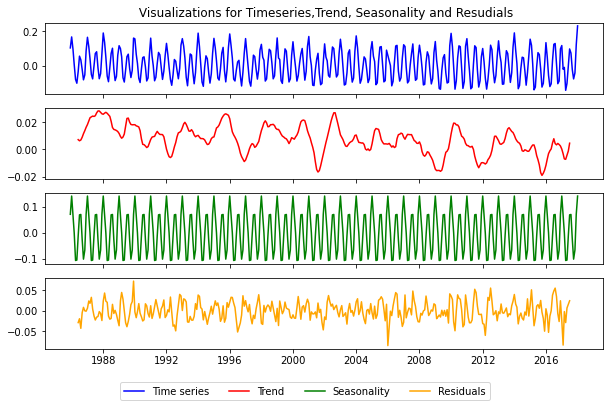

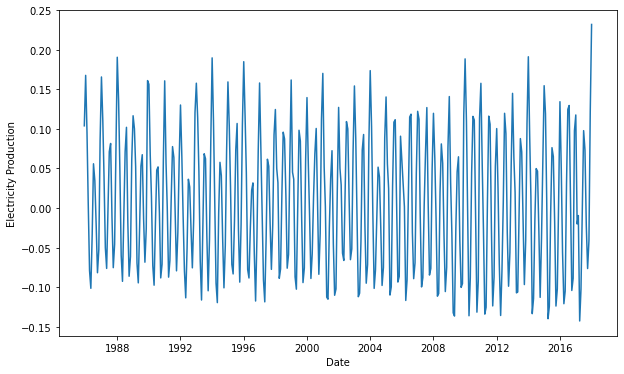

In [98]:
#decomposing after detrending

decompose(DTrend)

#visualize

plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.plot(DTrend)

The trend has been removed and is no longer a uptrend

## Remove Seasonality
The seasonality is removed using exponential decay transform

In [99]:
exp_decay=DTrend.ewm(halflife=12,min_periods=0,adjust=True).mean()
remove_seasonality=DTrend-exp_decay
remove_seasonality.dropna(inplace=True)

In [100]:
test(remove_seasonality)

Results of ADFT
Test Statistic             -7.213160e+00
P-value                     2.207771e-10
Lags Used                   1.400000e+01
No. of Observations Used    3.710000e+02
critical value (1%)        -3.448100e+00
critical value (5%)        -2.869362e+00
critical value (10%)       -2.570937e+00
dtype: float64


Now our P-Value is less than 0.05, we can ascertain that the time series is stationary.

## Autocorrelation and Partial Autocorrelation
The plots of ACF and PACF helps to find p,q, and d values

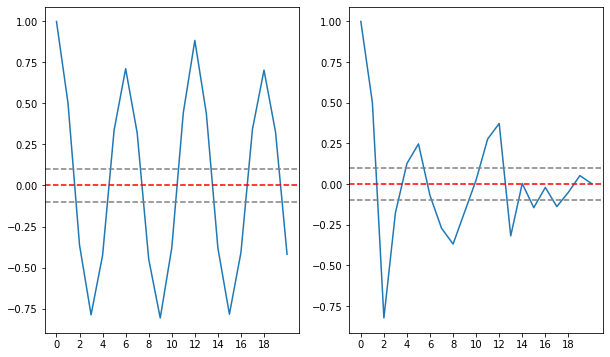

In [101]:
#Plotting ACF and PACF
lag_acf=acf(remove_seasonality,nlags=20)
lag_pacf=pacf(remove_seasonality,nlags=20,method='ywm')

#plot acf

plt.show()
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(remove_seasonality)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(remove_seasonality)), linestyle='--',color='gray')
plt.xticks(range(0,20,2))

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(remove_seasonality)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(remove_seasonality)), linestyle='--',color='gray')

plt.xticks(range(0,20,2))
plt.show()

From the graph the values of p,q are 2,2 respectively. The values are detremined where the graph crosses y=0

## ARIMA Model

In [102]:
model_values=remove_seasonality.values
train=model_values[1:len(model_values)-10]
test=model_values[len(model_values)-10:]


In [103]:
model=ARIMA(train,order=(2,1,2))
AR_model=model.fit(method_kwargs={'warn_convergence':False})
pred_model=AR_model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
score=mean_squared_error(test,pred_model)
print('MSE: {}'.format(round(score,4)))

MSE: 0.0019


The model has a Mean Squared Error of 0.0019. A smaller value shows that the predicted value are closer to the actual values. Better models have small MSE

## Plot between Predicted and Actual values

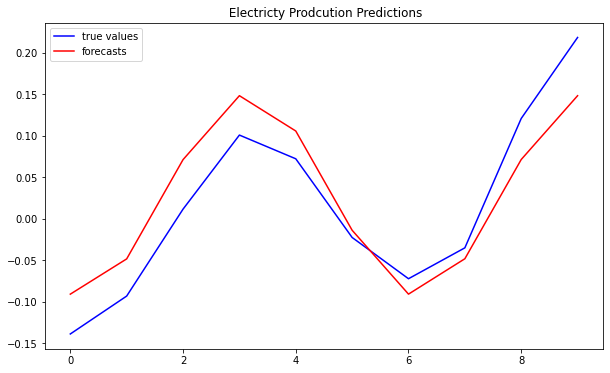

In [104]:
plt.plot(test,label='true values',color='blue')
plt.plot (pred_model, label='forecasts',color='red')
plt. title(' Electricty Prodcution Predictions')
plt.legend(loc='best')

## AR Model

In [105]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train,lags=25)
model_fit = model.fit()
pred_model=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
score=mean_squared_error(test,pred_model)
print('MSE: {}'.format(round(score,4)))


MSE: 0.0025


## Plot between Predicted and Actual values

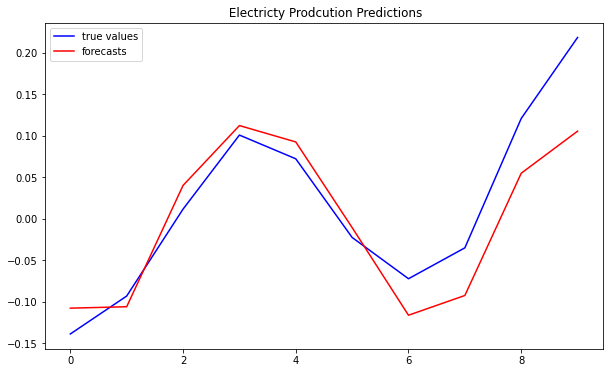

In [106]:
plt.plot(test,label='true values',color='blue')
plt.plot (pred_model, label='forecasts',color='red')
plt. title(' Electricty Prodcution Predictions')
plt.legend(loc='best')

## ARMA Model

In [107]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,0, 1))
model_fit = model.fit()
pred_model=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
score=mean_squared_error(test,pred_model)
print('MSE: {}'.format(round(score,4)))

MSE: 0.011


## Plot between Predicted and Actual values

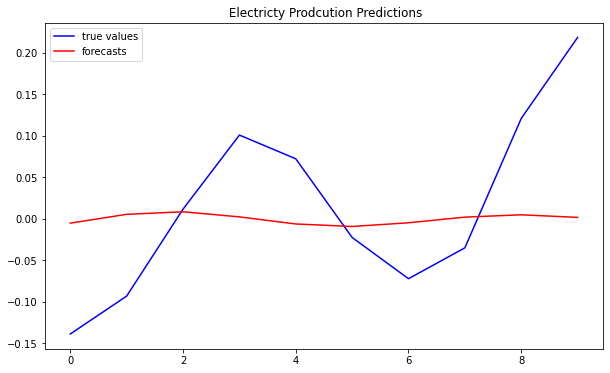

In [108]:
plt.plot(test,label='true values',color='blue')
plt.plot (pred_model, label='forecasts',color='red')
plt. title(' Electricty Prodcution Predictions')
plt.legend(loc='best')

## MA Model

__There are various types of moving averages__:

1. Simple Moving Average(SMA):
2. Cumulative Moving Average(CMA):
3. Exponential Moving Average(EMA):

In [109]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['value'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][len(model_values)-10:] = y_hat_sma['sma_forecast'][len(model_values)-10-1]

## Plot between Predicted and Actual values

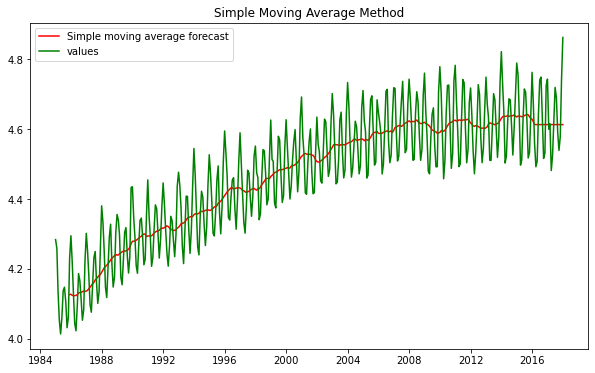

In [110]:
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast',color='r')
plt.plot(data['value'],label='values',color='g')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()


__Conclusion:__
1. Lower the MSE better the model
2. ARIMA model is so far best model because of lower MSE of 0.0019